# Clustering

In [1]:
# Importing datasets

import pandas as pd
import numpy as np

dataset = pd.read_csv("clustering.csv")

In [2]:
dataset.shape

(85, 5)

In [4]:
dataset.corr()

,x0,x1,x2,x3,x4
x0,1.000000,-0.158794,-0.186527,0.874391,-0.063295
x1,-0.158794,1.000000,0.698024,-0.354751,0.755113
x2,-0.186527,0.698024,1.000000,-0.220207,0.196032
x3,0.874391,-0.354751,-0.220207,1.000000,-0.370168
x4,-0.063295,0.755113,0.196032,-0.370168,1.000000


In [5]:
dataset.describe()

,x0,x1,x2,x3,x4
count,85.000000,85.000000,85.000000,85.000000,85.000000
mean,2.817069,2.748916,2.035626,4.360334,2.628691
std,1.804590,2.496234,2.471162,3.590181,2.012583
min,0.040614,-2.268887,-0.595652,-0.257424,-1.013659
25%,1.087289,0.886838,0.393542,0.736619,0.439842
50%,3.245579,2.148492,1.244704,5.923414,3.178894
75%,4.443743,5.099830,2.493123,7.858465,4.030374
max,6.421292,7.094901,7.938085,9.464671,6.330105


In [6]:
dataset.isnull().sum()

x0    0
x1    0
x2    0
x3    0
x4    0
dtype: int64

In [7]:
dataset.drop("x0", axis=1, inplace=True) #Correlation indicates that x0 and x3 may be redundant

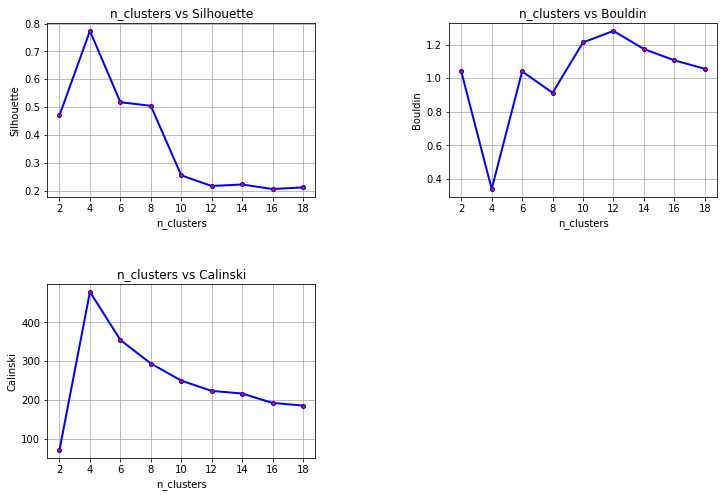

In [8]:
#Análise de clusters

from sklearn.cluster import KMeans, DBSCAN, MeanShift
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
import matplotlib.pyplot as plt
import seaborn as sns

def avaliacao(model, dataset):
    
    model.fit(dataset)

    labels = model.labels_
    
    try:
        silhouette = silhouette_score(dataset, labels)
        bouldin = davies_bouldin_score(dataset, labels)
        calinski = calinski_harabasz_score(dataset, labels)
    except ValueError:
        silhouette, bouldin, calinski = 0,0,0
        
    return silhouette, bouldin, calinski

def config_axes(axes, title, param_values, x_label):
    axes.set_xticks(param_values)
    axes.grid(True)
    axes.title.set_text(title)
    axes.set_xlabel(x_label)
    axes.set_ylabel(title.split()[2])
    


def plot_info(params, dataset):
    if "n_clusters" in params.keys():
        fig = plt.figure(figsize=(12,8))
        silh = fig.add_subplot(2,2,1)
        bould = fig.add_subplot(2,2,2)
        calin = fig.add_subplot(2,2,3)
        names = {silh:"n_clusters vs Silhouette", bould: "n_clusters vs Bouldin", calin: "n_clusters vs Calinski"}
        X = []
        arrayS = []
        arrayB = []
        arrayC = []

        for i in params["n_clusters"]:
            model = KMeans(n_clusters=i)
            silhouette, bouldin, calinski = avaliacao(model, dataset)
            X.append(i)
            arrayS.append(silhouette)
            arrayB.append(bouldin)
            arrayC.append(calinski)




        plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.5, hspace=0.5)

        axes = [silh, bould, calin]
        for ax in axes:
            config_axes(ax, names[ax], params["n_clusters"], "n_clusters")

        silh.plot(X, arrayS, 'bo-', markerfacecolor='r', linewidth=2, markersize=4)
        bould.plot(X, arrayB, 'bo-', markerfacecolor='r', linewidth=2, markersize=4)
        calin.plot(X, arrayC, 'bo-', markerfacecolor='r', linewidth=2, markersize=4)
        
    elif "eps" in params.keys():

        fig = plt.figure(figsize=(12,8))
        silh = fig.add_subplot(2,2,1)
        bould = fig.add_subplot(2,2,2)
        calin = fig.add_subplot(2,2,3)
        names = {silh:"eps vs Silhouette", bould: "eps vs Bouldin", calin: "eps vs Calinski"}
        X = []
        arrayS = []
        arrayB = []
        arrayC = []

        for i in params["eps"]:
            if "min_samples" in params.keys():
                min_samples = params["min_samples"]
            else:
                min_samples = 2*dataset.shape[1]
                
            model = DBSCAN(eps=i, min_samples=min_samples)
            silhouette, bouldin, calinski = avaliacao(model, dataset)
            X.append(i)
            arrayS.append(silhouette)
            arrayB.append(bouldin)
            arrayC.append(calinski)




        plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.5, hspace=0.5)

        axes = [silh, bould, calin]
        for ax in axes:
            config_axes(ax, names[ax], params["eps"], "eps")

        silh.plot(X, arrayS, 'bo-', markerfacecolor='r', linewidth=2, markersize=4)
        bould.plot(X, arrayB, 'bo-', markerfacecolor='r', linewidth=2, markersize=4)
        calin.plot(X, arrayC, 'bo-', markerfacecolor='r', linewidth=2, markersize=4)
        
    elif "bandwidth" in params.keys():
        
        fig = plt.figure(figsize=(12,8))
        silh = fig.add_subplot(2,2,1)
        bould = fig.add_subplot(2,2,2)
        calin = fig.add_subplot(2,2,3)
        names = {silh:"bandwidth vs Silhouette", bould: "bandwidth vs Bouldin", calin: "bandwidth vs Calinski"}
        X = []
        arrayS = []
        arrayB = []
        arrayC = []

        for i in params["bandwidth"]:
                
            model = MeanShift(bandwidth=i)
            silhouette, bouldin, calinski = avaliacao(model, dataset)
            X.append(i)
            arrayS.append(silhouette)
            arrayB.append(bouldin)
            arrayC.append(calinski)




        plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.5, hspace=0.5)

        axes = [silh, bould, calin]
        for ax in axes:
            config_axes(ax, names[ax], params["bandwidth"], "bandwidth")

        silh.plot(X, arrayS, 'bo-', markerfacecolor='r', linewidth=2, markersize=4)
        bould.plot(X, arrayB, 'bo-', markerfacecolor='r', linewidth=2, markersize=4)
        calin.plot(X, arrayC, 'bo-', markerfacecolor='r', linewidth=2, markersize=4)
        
plot_info({"n_clusters":np.arange(2,20,2)}, dataset)


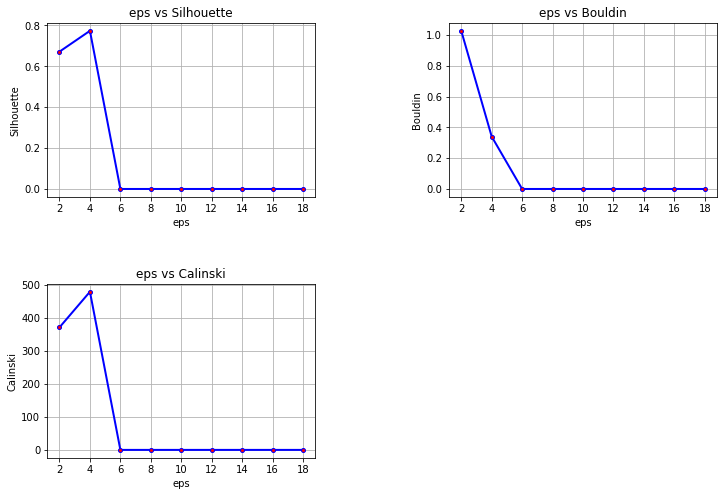

In [9]:
plot_info({"eps":np.arange(2,20,2)}, dataset)

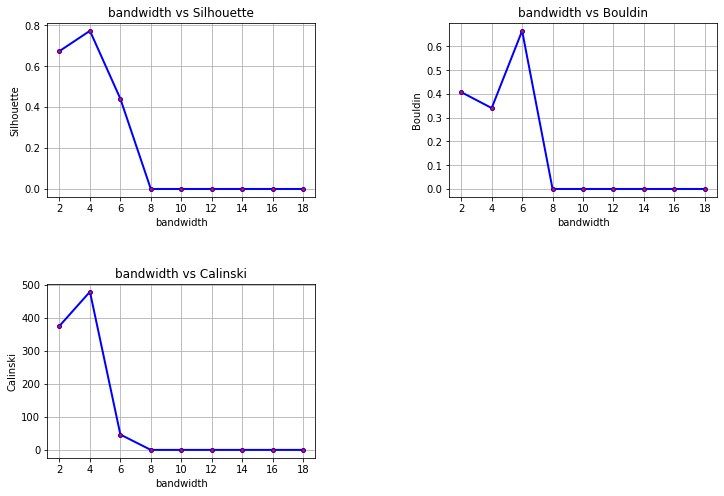

In [10]:
plot_info({"bandwidth":np.arange(2,20,2)}, dataset)

In [11]:
model = KMeans(n_clusters=4)
avaliacao(model, dataset)

a,b,c = avaliacao(model, dataset)
a

0.7737544081842505

In [12]:
# Structure test of KMeans clusters

random_data = np.random.rand(85,5)
real = avaliacao(KMeans(n_clusters=4), dataset)
aleatorio = avaliacao(KMeans(n_clusters=4), random_data)
print(f"Real dataset : S={real[0]}, B={real[1]}, C={real[2]}\nRandom dataset: S={aleatorio[0]}, B={aleatorio[1]}, C={aleatorio[2]}")

Real dataset : S=0.7737544081842505, B=0.34071741772995434, C=478.6973842122425
Random dataset: S=0.1787494456071582, B=1.6440805278777995, C=18.416362592052117


In [13]:
# Stability test of KMeans clusters

set1, set2, set3 = np.array_split(dataset.sample(frac=1),3)

aval_set1 = avaliacao(KMeans(n_clusters=4), set1)
aval_set2 = avaliacao(KMeans(n_clusters=4), set2)
aval_set3 = avaliacao(KMeans(n_clusters=4), set3)

print(f"Dataset 1: S={aval_set1[0]}, B={aval_set1[1]}, C={aval_set1[2]}\n\
Dataset 2: S={aval_set2[0]}, B={aval_set2[1]}, C={aval_set2[2]}\n\
Dataset 3: S={aval_set3[0]}, B={aval_set3[1]}, C={aval_set3[2]}")

Dataset 1: S=0.7608206954734545, B=0.3603277122749073, C=180.36925972662073
Dataset 2: S=0.7951312516454194, B=0.2956954326168528, C=170.3785594455559
Dataset 3: S=0.7621157204008365, B=0.3137437101975969, C=141.43711723576868


In [14]:
# Selecting attributes for visualization
cluster_final = KMeans(n_clusters=4).fit(dataset)
dataset_clusterizado = dataset.copy(deep=True)
dataset_clusterizado["Cluster"] = cluster_final.labels_
centroids = cluster_final.cluster_centers_

# Getting "attributes" variance based on centroids
var = []
for i in range(len(centroids[0])):
    var.append(centroids[:, i].var())
    
var

[6.0014620460009365, 7.043362921643141, 11.962611545960135, 3.419307152633759]

<AxesSubplot:xlabel='x1', ylabel='x3'>

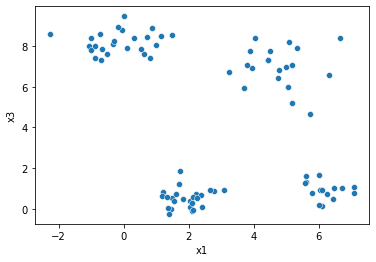

In [15]:
# Plotting x1 vs x3 and x2 vs x3


sns.scatterplot(x="x1", y="x3", data=dataset)

<AxesSubplot:xlabel='x2', ylabel='x3'>

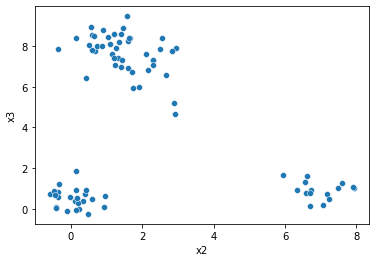

In [16]:
sns.scatterplot(x="x2", y="x3", data=dataset)